#### Feature processing

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


data = pd.read_csv('train.csv')

#data = numpy.array(data)  #convert array to numpy type array

df_train ,df_test = train_test_split(data,test_size=0.2)

Y_train = df_train.iloc[0:, 2].values
text_train = df_train.iloc[0:, 1].values
vect = TfidfVectorizer(ngram_range=(1,3), min_df=2)
#vect = DictVectorizer()
#vec = CountVectorizer()
#X_train = vec.fit_transform(text_train)
#feature_names = np.asarray(vect.get_feature_names())


Y_test = df_test.iloc[0:, 2].values
text_test = df_test.iloc[0:, 1].values
#The Test Data it does not have label 
#df_realtest = pd.read_csv('test.csv', header=None)
#realtext_text = df_realtest.iloc[0:,1].values 


In [5]:
data.head()

qid                                      question_text  \
0  00002165364db923c7e6  How did Quebec nationalists see their province...   
1  000032939017120e6e44  Do you have an adopted dog, how would you enco...   
2  0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
3  000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
4  0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

import re
from collections import Counter

def ngrams(tokens, n):
    output = []
    for i in range(n-1, len(tokens)):
        ngram = ' '.join(tokens[i-n+1:i+1])
        output.append(ngram)
    return output

def features(text, ngram_range=(1,1)):
    text = text.lower()      # make the string lowercase
    text = re.sub(r'(.)\1+', r'\1\1', text)     # remove consecutive characters that are repeated more than twice
    
    features_in_text = []   # running list of all features in this instance (can be repeated)
    
    # treat alphanumeric characters as word tokens (removing anything else),
    # and extract all n-grams of length n specified by ngram_range
    
    text_alphanum = re.sub('[^a-z0-9]', ' ', text)
    for n in range(ngram_range[0], ngram_range[1]+1):
        features_in_text += ngrams(text_alphanum.split(), n)
    
    # now treat punctuation as word tokens, and get their counts (only unigrams)
    
    text_punc = re.sub('[a-z0-9]', ' ', text)
    features_in_text += ngrams(text_punc.split(), 1)
    
    # 'Counter' converts a list into a dictionary whose keys are the list elements 
    #  and the values are the number of times each element appeared in the list
    
    return Counter(features_in_text)

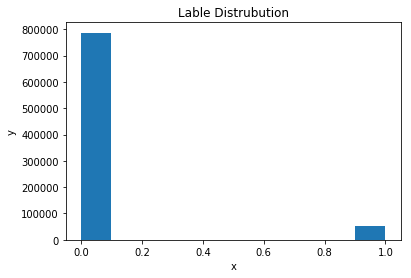

In [4]:
import matplotlib.pyplot as plt
df_train.iloc[0:, 2].plot.hist()
plt.title('Lable Distrubution')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(axis='y', alpha=0)

#### Feature Selection 

In [5]:
from sklearn.feature_selection import SelectPercentile, chi2

# example: feature selection at the 60th percentile.
# Note the renaming of the feature vectors to X_train_selected
p = [1,2,5,10,30,50,70,100]
ngram =[(1,1),(2,2),(1,3)]
ac1=[]
ac2=[]
ac3=[]
for n in ngram:
    for i in p:
        X_train = vect.fit_transform(features(d, ngram_range=n) for d in text_train)
        selection = SelectPercentile(percentile=i, score_func=chi2)
        X_train_selected = selection.fit_transform(X_train[:100000], Y_train[:100000])

        # code for 1.3 here

       
        base_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)
        params = [{'C': [0.01, 0.1, 1.0]}]
        gs_classifier1 = GridSearchCV(base_classifier, params, cv=5)
        gs_classifier1.fit(X_train_selected[:100000], Y_train[:100000])
        #print(i,n)
        if n == (1,1):
            ac1.append(gs_classifier1.best_score_)
        if n == (2,2):
            ac2.append(gs_classifier1.best_score_)
        if n == (1,3):
            ac3.append(gs_classifier1.best_score_)
        print("Percentile selected and gram number",i,n)
        print("Best parameter settings:", gs_classifier1.best_params_)
        print("Validation accuracy: %0.6f" % gs_classifier1.best_score_)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 1 (1, 1)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.952940


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 2 (1, 1)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.953110


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 5 (1, 1)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.952100


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 10 (1, 1)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.951560


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 30 (1, 1)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.951130


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 50 (1, 1)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.950660


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 70 (1, 1)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.950660


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 100 (1, 1)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.950660


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 1 (2, 2)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.949510


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 2 (2, 2)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.946510


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 5 (2, 2)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.946090


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 10 (2, 2)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.946490


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 30 (2, 2)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.946600


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 50 (2, 2)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.946640


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 70 (2, 2)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.946610


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 100 (2, 2)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.946640


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 1 (1, 3)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.955930


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 2 (1, 3)
Best parameter settings: {'C': 0.1}
Validation accuracy: 0.949640


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 5 (1, 3)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.950630


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 10 (1, 3)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.951470


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 30 (1, 3)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.951800


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 50 (1, 3)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.951800


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 70 (1, 3)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.951800


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

Percentile selected and gram number 100 (1, 3)
Best parameter settings: {'C': 1.0}
Validation accuracy: 0.951810


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


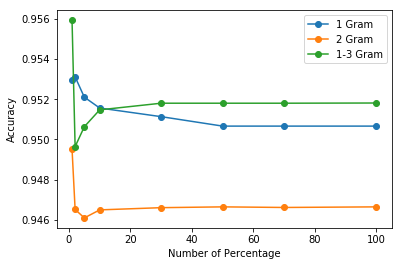

In [6]:
import matplotlib.pyplot as plt
#plt.plot(alpha, actrain,actest, marker='o')
plt.plot(p,ac1,marker='o',label='1 Gram')
plt.plot(p,ac2,marker='o',label='2 Gram')
plt.plot(p,ac3,marker='o',label='1-3 Gram')
plt.xlabel('Number of Percentage')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

plt.show()

In [6]:
#X_train = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train)
#X_test = vect.transform(features(d, ngram_range=(1,3)) for d in text_test)
X_train = vect.fit_transform(text_train)
X_test = vect.fit_transform(text_test)

In [8]:
from sklearn.feature_selection import SelectPercentile, chi2
selection = SelectPercentile(percentile=2, score_func=chi2)
X_train_final = selection.fit_transform(X_train, Y_train)
feature_names = np.asarray(vect.get_feature_names())

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score

classifier = SGDClassifier(loss='perceptron', max_iter=1000, tol=1.0e-12, random_state=123,average=True)
classifier.fit(X_train_final, Y_train)

#print("Number of SGD iterations: %d" % classifier.n_iter_)
#print("Training accuracy: %0.6f" % accuracy_score(Y_train, classifier.predict(X_train)))
#print("Testing accuracy: %0.6f" % accuracy_score(Y_test, classifier.predict(X_test)))

print("\nFeature weights:")
args = np.argsort(classifier.coef_[0])
for a in args:
    print(" %s: %0.4f" % (feature_names[a], classifier.coef_[0][a]))


Feature weights:
 3g welding: -0.0068
 3g of hydrogen: -0.0064
 34800 pay: -0.0062
 66104: -0.0061
 31 identical pieces: -0.0059
 1 square root: -0.0059
 a broke young: -0.0058
 2 samples for: -0.0057
 3ghz: -0.0057
 11 punjab in: -0.0056
 7 were: -0.0056
 1972 1973 had: -0.0056
 2015 2016 2017: -0.0056
 2 89 2: -0.0056
 360 in 2018: -0.0056
 1 00 as: -0.0055
 74 2: -0.0055
 2 managers what: -0.0055
 100 crore: -0.0055
 a blackmailer is: -0.0054
 10 to15: -0.0054
 2008 wimbledon final: -0.0054
 a cabinet: -0.0054
 100 lakhs a: -0.0053
 2 0 3: -0.0053
 500 thousand dollars: -0.0053
 2018 jan: -0.0053
 a business how: -0.0053
 5 00 from: -0.0053
 6 x 1: -0.0053
 2 storied house: -0.0052
 10 dragons in: -0.0052
 3x 2 12xy: -0.0052
 70 in cbse: -0.0052
 5 4 116lbs: -0.0052
 23 in physics: -0.0052
 42 ounces: -0.0052
 0 018 moles: -0.0052
 6x6 and: -0.0052
 a bed sore: -0.0052
 374 c: -0.0051
 0 ex 200: -0.0051
 6 01 or: -0.0051
 3 guys before: -0.0051
 1 person why: -0.0051
 7 best: -0.00

 45mm standard: -0.0029
 32gb otg pendrive: -0.0029
 271 pound girl: -0.0029
 8 years after: -0.0029
 51 00 in: -0.0029
 60126: -0.0029
 3d modelling challenges: -0.0029
 9 7 10: -0.0029
 164 166 are: -0.0029
 50 leads: -0.0029
 1 3 bisphosphoglycerate: -0.0029
 3cm high when: -0.0029
 a 2 500: -0.0029
 a black pair: -0.0029
 40 questions: -0.0029
 8 9 10: -0.0029
 a centralised cryptocurrency: -0.0029
 a certain state: -0.0029
 5 core cable: -0.0029
 34 carry: -0.0029
 5th of april: -0.0029
 5x 1 3: -0.0029
 3o2 equal: -0.0029
 a 25v: -0.0029
 38 flights: -0.0029
 24 60 120: -0.0029
 24 627 rank: -0.0029
 a botox: -0.0029
 8tracks start charging: -0.0029
 1 original motherboard: -0.0029
 11th class murdered: -0.0029
 7 4: -0.0029
 5 year old: -0.0029
 64mg on phone: -0.0029
 66 45: -0.0029
 a better civilized: -0.0029
 a 4k uhd: -0.0029
 3 lgbt 4: -0.0029
 2 2017 movie: -0.0029
 a castration at: -0.0029
 a cart: -0.0029
 a billion consumers: -0.0029
 122 in: -0.0029
 122 in cgl: -0.00

 a book it: -0.0028
 8gb 133: -0.0028
 501 jeans: -0.0028
 12step programs hold: -0.0028
 1884 1885 held: -0.0028
 a any friends: -0.0028
 1549 landing: -0.0028
 1549 landing have: -0.0028
 4 0 with: -0.0028
 6 are drawn: -0.0028
 a bar how: -0.0028
 8th of: -0.0028
 a birds it: -0.0028
 12th this: -0.0028
 a 300 bed: -0.0028
 10 7 2: -0.0028
 407 sc in: -0.0028
 2d model even: -0.0028
 325 00 00: -0.0028
 08t19: -0.0028
 2018 state: -0.0028
 3 sentences each: -0.0028
 2013 to a: -0.0028
 2013 or get: -0.0028
 5 7 father: -0.0028
 6 and 7: -0.0028
 9 8 n: -0.0028
 30 days free: -0.0028
 9 articles: -0.0028
 25k intended: -0.0028
 60 by the: -0.0028
 1 home: -0.0028
 1 horse: -0.0028
 18 25: -0.0028
 4d56: -0.0028
 42 195: -0.0028
 a 2010 nissan: -0.0028
 200 dollars a: -0.0028
 a addiction: -0.0028
 1900s wear: -0.0028
 7 in 7: -0.0028
 84 what: -0.0028
 12th it: -0.0028
 5 and 12: -0.0028
 90 150: -0.0028
 20 30 hour: -0.0028
 1 atmosphere: -0.0028
 2027: -0.0028
 3 units and: -0.0028

 a banquet: -0.0025
 1 million people: -0.0025
 a arabic: -0.0025
 a average person: -0.0025
 950xl: -0.0025
 577 in: -0.0025
 332 series: -0.0025
 99 695: -0.0025
 12 chemistry coordination: -0.0025
 529 for: -0.0025
 8 billions virgins: -0.0025
 36 days grace: -0.0025
 3 musketeers: -0.0025
 46th: -0.0025
 1131 8: -0.0025
 7th semester in: -0.0025
 166lbs 5ft: -0.0025
 6 interest: -0.0025
 a 100ohm potentiometer: -0.0025
 5 2 what: -0.0025
 a ceo should: -0.0025
 a buzzword: -0.0025
 a beef casserole: -0.0025
 6 how do: -0.0025
 5minutes to complete: -0.0025
 350 is there: -0.0025
 720 on sat: -0.0025
 89 26: -0.0025
 2 kgs: -0.0025
 240 year: -0.0025
 2 sum: -0.0025
 125 amp boiler: -0.0025
 93 chapter refraction: -0.0025
 1 5 2: -0.0025
 1 5 2018: -0.0025
 a camera person: -0.0025
 7 mm: -0.0025
 4 pcc construction: -0.0025
 1b arms: -0.0025
 55 in aiims: -0.0025
 a blue cut: -0.0025
 14 is 5: -0.0025
 5k and mark: -0.0025
 5 3d tempered: -0.0025
 a b parallel: -0.0025
 2 75: -0.00

 4 my: -0.0022
 6 pack in: -0.0022
 72kgs in a: -0.0022
 7 doing nothing: -0.0022
 2 8x and: -0.0022
 10 unknowns: -0.0022
 100 printer j110a: -0.0022
 4k video: -0.0022
 49 percentile in: -0.0022
 1970s computer: -0.0022
 15 1: -0.0022
 15 1 2: -0.0022
 7 inch erect: -0.0022
 5ghz only: -0.0022
 2a 1 2sin: -0.0022
 52 b: -0.0022
 9 00 a: -0.0022
 23 0: -0.0022
 a blank firing: -0.0022
 18 s: -0.0022
 01 200 1: -0.0022
 2nd samuel: -0.0022
 10 degree rotation: -0.0022
 99 2 in: -0.0022
 590490: -0.0022
 10 2 4: -0.0022
 25k in vitee: -0.0022
 a book at: -0.0022
 6 week industrial: -0.0022
 17 days my: -0.0022
 25 still young: -0.0022
 18 megapixels but: -0.0022
 1920 s: -0.0022
 10th grade how: -0.0022
 10th grade i: -0.0022
 5min 10min: -0.0022
 10 particiy in: -0.0022
 10 particiy: -0.0022
 65 polyester and: -0.0022
 3d holograms be: -0.0022
 6th standard students: -0.0022
 80 crore: -0.0022
 9 percentile: -0.0022
 80s what: -0.0022
 50 am i: -0.0022
 6 wc i: -0.0022
 a calculator ad

 10 in rajouri: -0.0020
 a 225lbs: -0.0020
 9 11 might: -0.0020
 5l v6: -0.0020
 8n each location: -0.0020
 8 whose forms: -0.0020
 6040 digital series: -0.0020
 a business all: -0.0020
 55 33: -0.0020
 6 weeks: -0.0020
 439 in: -0.0020
 45 kg: -0.0020
 69600: -0.0020
 a budget i: -0.0020
 43kg: -0.0020
 2 support fast: -0.0020
 10 apps excluding: -0.0020
 29 and i: -0.0020
 287 case and: -0.0020
 29 and number: -0.0020
 60 rather: -0.0020
 4th hardware software: -0.0020
 500c shotgun: -0.0020
 1248: -0.0020
 60 but now: -0.0020
 1: -0.0020
 2008 r2: -0.0020
 100 notes with: -0.0020
 8mnths not continuous: -0.0020
 a blog without: -0.0020
 4 pro will: -0.0020
 22 a: -0.0020
 730 years how: -0.0020
 10 5kg: -0.0020
 2gb to 3gb: -0.0020
 2gb variant: -0.0020
 4 72: -0.0020
 a authority: -0.0020
 150 v: -0.0020
 a bowling team: -0.0020
 1 dead: -0.0020
 3 56 wgpa: -0.0020
 41 and i: -0.0020
 960 pro 512: -0.0020
 a baby carrier: -0.0020
 a bullet proof: -0.0020
 1100 what: -0.0020
 1100 w

 240 fps: -0.0019
 240 in: -0.0019
 a biblical name: -0.0019
 40th: -0.0019
 155 pounds i: -0.0019
 155 raw: -0.0019
 1 2 k: -0.0019
 a baraat arrival: -0.0019
 7 i am: -0.0019
 34 yrs any: -0.0019
 100 investment: -0.0019
 100 invested: -0.0019
 6 cd: -0.0019
 742 30 06: -0.0019
 9 or galaxy: -0.0019
 9 million votes: -0.0019
 2 hbr: -0.0019
 10 cbse maths: -0.0019
 5509 2038 436: -0.0019
 3g 4g lte: -0.0019
 11 cm: -0.0019
 72 pill: -0.0019
 7 game of: -0.0019
 39 about moon: -0.0019
 2 mean written: -0.0019
 4 time and: -0.0019
 43 164x147 87: -0.0019
 5 1 and: -0.0019
 20 9: -0.0019
 20 9 17: -0.0019
 5 compounding: -0.0019
 1 way to: -0.0019
 2 doors: -0.0019
 10 lowest: -0.0019
 ]^: -0.0019
 a category: -0.0019
 1 v2 c2: -0.0019
 2k views why: -0.0019
 a biomolecule: -0.0019
 240 minutes is: -0.0019
 1 06am visakhapatnam: -0.0019
 240 or: -0.0019
 9gag: -0.0019
 a 2010 audi: -0.0019
 8085 and 8086: -0.0019
 !}\: -0.0019
 100 employees would: -0.0019
 a car do: -0.0019
 3500 100: 

 14 and she: -0.0018
 7 devlelpment: -0.0018
 5 galaxies: -0.0018
 a body that: -0.0018
 10 amps: -0.0018
 4 10 85: -0.0018
 5 mile races: -0.0018
 90s and witnesses: -0.0018
 50n acts horizontally: -0.0018
 5 month and: -0.0018
 93k: -0.0018
 8192 bit bus: -0.0018
 2nd class: -0.0018
 2nd class citizens: -0.0018
 39k in: -0.0018
 a blocking agent: -0.0018
 835670 border: -0.0018
 10mbps: -0.0018
 1 infty x: -0.0018
 1 infty sum: -0.0018
 5 million naira: -0.0018
 2 year gmat: -0.0018
 a bank teller: -0.0018
 7th grade ela: -0.0018
 12 gst component: -0.0018
 16 to get: -0.0018
 418: -0.0018
 2017 with overall: -0.0018
 1 or 6q: -0.0018
 1990 1996: -0.0018
 2 question: -0.0018
 1900 euro: -0.0018
 0 7 number: -0.0018
 5 crypto currencies: -0.0018
 12th math this: -0.0018
 12th math exam: -0.0018
 448 5013: -0.0018
 2018 general eletions: -0.0018
 93 x: -0.0018
 6 5 lakhs: -0.0018
 5n to move: -0.0018
 7 fireman: -0.0018
 2 5ghz and: -0.0018
 20714 can i: -0.0018
 96 and i: -0.0018
 a b

 36 59 parallel: -0.0017
 8 respectively: -0.0017
 932: -0.0017
 7 sinx n: -0.0017
 2019 do you: -0.0017
 29 gallon fish: -0.0017
 100 among: -0.0017
 20th c what: -0.0017
 5 percent weaker: -0.0017
 5mv the available: -0.0017
 11kv side: -0.0017
 11kv side of: -0.0017
 370 became: -0.0017
 1v 2 1a: -0.0017
 56 327 kilometers: -0.0017
 a cartoon character: -0.0017
 4m cheaper: -0.0017
 5394 in: -0.0017
 5kg rice from: -0.0017
 50k illegal: -0.0017
 a broken back: -0.0017
 a centralized uk: -0.0017
 8 considered: -0.0017
 83 6: -0.0017
 50 to get: -0.0017
 10 dollars for: -0.0017
 a 15 lakhs: -0.0017
 4c hair: -0.0017
 3600 per: -0.0017
 7 too late: -0.0017
 2018 and wants: -0.0017
 5th army 4th: -0.0017
 a burning throat: -0.0017
 a better candidate: -0.0017
 1 i 13: -0.0017
 10 185 what: -0.0017
 a boyfriend and: -0.0017
 8760w mxm gpu: -0.0017
 a beginner likes: -0.0017
 500aed enough: -0.0017
 75 times: -0.0017
 96sqcm: -0.0017
 6 binary: -0.0017
 7 weeks after: -0.0017
 a business 

 8 pointer: -0.0016
 3 a m: -0.0016
 3 a day: -0.0016
 2017 ranking: -0.0016
 148 109 between: -0.0016
 41448 from general: -0.0016
 a camera or: -0.0016
 3 sides called: -0.0016
 3 sides of: -0.0016
 7 using: -0.0016
 1 19: -0.0016
 39 year: -0.0016
 6 were unarmed: -0.0016
 20s but that: -0.0016
 a better wolverine: -0.0016
 a beneficiary daughter: -0.0016
 77th attorney: -0.0016
 40 acceptance: -0.0016
 420405751: -0.0016
 57 for sem: -0.0016
 60 55: -0.0016
 34 792: -0.0016
 34 71: -0.0016
 3 lpa: -0.0016
 3 lpa please: -0.0016
 a cat hiss: -0.0016
 750 woodsmaster 30: -0.0016
 1 proton was: -0.0016
 35a is: -0.0016
 54 23: -0.0016
 42 meters: -0.0016
 925 italy: -0.0016
 45 in: -0.0016
 a blurry screen: -0.0016
 8gms: -0.0016
 180 i: -0.0016
 180 i have: -0.0016
 11th pre: -0.0016
 2 live: -0.0016
 13 pt 1: -0.0016
 a celebration of: -0.0016
 5th house aquarius: -0.0016
 0075 in a: -0.0016
 0d to 10d: -0.0016
 3 w3: -0.0016
 8 announced: -0.0016
 8 announced at: -0.0016
 60fps scr

 3 meals: -0.0015
 3 meals a: -0.0015
 3yrs 300hrs: -0.0015
 7x 5: -0.0015
 36 degree mason: -0.0015
 a bright pool: -0.0015
 500 responses: -0.0015
 1763 establish the: -0.0015
 1972 after winning: -0.0015
 236 in iet: -0.0015
 24g carbon sample: -0.0015
 2017 english literature: -0.0015
 24g carbon: -0.0015
 250 engine: -0.0015
 250 employees: -0.0015
 2k 4 math: -0.0015
 2 engineering programs: -0.0015
 1 beside your: -0.0015
 18 skill moves: -0.0015
 18 skill: -0.0015
 6s and oneplus: -0.0015
 5 every: -0.0015
 22 centerfire: -0.0015
 a big porn: -0.0015
 52 of yu: -0.0015
 1 lakh crl: -0.0015
 5gb ram: -0.0015
 603 00: -0.0015
 7ah: -0.0015
 1 7 at: -0.0015
 3 dha epa: -0.0015
 2items: -0.0015
 46 year: -0.0015
 600men: -0.0015
 70 the: -0.0015
 60 km from: -0.0015
 50 5045 scale: -0.0015
 60 km up: -0.0015
 159 cm height: -0.0015
 511 out: -0.0015
 240v 1: -0.0015
 a better return: -0.0015
 580 as per: -0.0015
 40hp in: -0.0015
 20 point: -0.0015
 037217: -0.0015
 3rd edition are

 81 yrs: -0.0014
 18 years older: -0.0014
 18 years old: -0.0014
 29 7 29: -0.0014
 29 7: -0.0014
 3051a e all: -0.0014
 62 replacement program: -0.0014
 56 and 18: -0.0014
 550d with: -0.0014
 80 percentile: -0.0014
 101: -0.0014
 101 00usd: -0.0014
 6 foot and: -0.0014
 10 millions: -0.0014
 7 pointers in: -0.0014
 93 in x: -0.0014
 4 11: -0.0014
 94875 rank in: -0.0014
 3d programming: -0.0014
 94875 rank: -0.0014
 1100d: -0.0014
 2017 entrance exam: -0.0014
 2017 entrance batches: -0.0014
 2 3 o: -0.0014
 25 by eliminating: -0.0014
 500 dollars max: -0.0014
 88 how: -0.0014
 7560 will: -0.0014
 31 2020 how: -0.0014
 1 of merchant: -0.0014
 3 idiots movies: -0.0014
 1 cm longer: -0.0014
 14 days of: -0.0014
 2ft away: -0.0014
 2ft away from: -0.0014
 2 700 to: -0.0014
 3 709 mg: -0.0014
 73 in xii: -0.0014
 3855 in: -0.0014
 10 paisi: -0.0014
 10 paise per: -0.0014
 7 for high: -0.0014
 a black swan: -0.0014
 70l in: -0.0014
 948: -0.0014
 76 of: -0.0014
 34 t 44: -0.0014
 a 5 wide:

 70 by only: -0.0014
 2017 rigged and: -0.0014
 30 minute: -0.0014
 2 kids crack: -0.0014
 2014 that north: -0.0014
 1 million lives: -0.0014
 8 girls 6: -0.0014
 138 sd15: -0.0014
 138 q 152: -0.0014
 2014 self: -0.0014
 720 and psat: -0.0014
 2015 can i: -0.0014
 2015 can: -0.0014
 7 units the: -0.0014
 a 8 month: -0.0014
 15 share: -0.0014
 1895 and: -0.0014
 11 without jailbreak: -0.0014
 a best youtube: -0.0014
 3 4 iits: -0.0014
 2 8 4: -0.0014
 2 8 2: -0.0014
 5 for a: -0.0014
 5 for an: -0.0014
 704: -0.0014
 10th term: -0.0014
 10th take cs: -0.0014
 600 32: -0.0014
 5 personality: -0.0014
 11 inches: -0.0014
 11 inches and: -0.0014
 2018 the year: -0.0014
 3d printing for: -0.0014
 200 monitor: -0.0014
 1992 and who: -0.0014
 a aryan: -0.0014
 a cell requires: -0.0014
 2019 today: -0.0014
 a cellular mobile: -0.0014
 22 7 in: -0.0014
 59 96 is: -0.0014
 a bitch face: -0.0014
 500 and 500: -0.0014
 194 marks general: -0.0014
 a 2009 yz250: -0.0014
 58 marks in: -0.0014
 1168 c

 99us: -0.0013
 1 cryptocurrency btc: -0.0013
 2k rank in: -0.0013
 20 college in: -0.0013
 a billionaire nowadays: -0.0013
 60x in: -0.0013
 8 2017 at: -0.0013
 98 101: -0.0013
 17 in iit: -0.0013
 7 billion human: -0.0013
 !!”,: -0.0013
 6 if: -0.0013
 00 thursday the: -0.0013
 00 thursday: -0.0013
 12 q x: -0.0013
 30x to 60x: -0.0013
 10 tb: -0.0013
 30x to: -0.0013
 357 to: -0.0013
 1b visa if: -0.0013
 0 864: -0.0013
 00 tons fell: -0.0013
 0 85 is: -0.0013
 5 digit numbers: -0.0013
 2017 preparation going: -0.0013
 90s and early: -0.0013
 582 so: -0.0013
 810 8 6: -0.0013
 a business into: -0.0013
 20 11: -0.0013
 3does not appear: -0.0013
 a breakaway state: -0.0013
 a breakaway rim: -0.0013
 1 7x: -0.0013
 5 auschwitz: -0.0013
 375th: -0.0013
 145 marks: -0.0013
 46 in iim: -0.0013
 a cd only: -0.0013
 5 seconds on: -0.0013
 a boyfriend for: -0.0013
 a 2015 nissan: -0.0013
 a 2015 pass: -0.0013
 17 do i: -0.0013
 10 00 litres: -0.0013
 4 9 become: -0.0013
 600 acres: -0.0013
 

 1 56 2: -0.0013
 1 question about: -0.0013
 15 if i: -0.0013
 2017 smartphone: -0.0013
 2017 smartphone under: -0.0013
 1992: -0.0013
 85 miles in: -0.0013
 72 108: -0.0013
 5 in injso: -0.0013
 1680 1710: -0.0013
 2008 how could: -0.0013
 2018 am: -0.0013
 2018 am an: -0.0013
 6ft fence i: -0.0013
 a bfsc bachelor: -0.0013
 1ft long: -0.0013
 7th floor of: -0.0013
 50lakhs per: -0.0013
 5x4 2: -0.0013
 6ix9ine lil: -0.0013
 a 45 colt: -0.0013
 9 years had: -0.0013
 8087 make: -0.0013
 a bigger school: -0.0013
 2017 which also: -0.0013
 0 cgpa in: -0.0013
 15 to 25: -0.0013
 1858: -0.0013
 10 0600 the: -0.0013
 30 says do: -0.0013
 2 4 8: -0.0013
 1 mile across: -0.0013
 30 says: -0.0013
 300 00 yen: -0.0013
 300 00euros: -0.0013
 4 last: -0.0013
 300 followers on: -0.0013
 2 2268: -0.0013
 4 felony in: -0.0013
 240s in: -0.0013
 600 electrons: -0.0013
 2018 bringing: -0.0013
 15 questions out: -0.0013
 2 x2 y2: -0.0013
 2 x5: -0.0013
 1 drop of: -0.0013
 30 concentration if: -0.0013


 700 basic accomodation: -0.0012
 60tb ssd s: -0.0012
 504 in neet: -0.0012
 2015 wc sf: -0.0012
 0 1 m: -0.0012
 0 1 math: -0.0012
 30k 37k with: -0.0012
 98 ethnic: -0.0012
 6months if i: -0.0012
 a 16 male: -0.0012
 7130x: -0.0012
 7 rather small: -0.0012
 01911c 19 lcd: -0.0012
 01911c 19: -0.0012
 17 years what: -0.0012
 2 reminder is: -0.0012
 1989 created: -0.0012
 299 record deal: -0.0012
 630v: -0.0012
 1 pi x: -0.0012
 12 17 23: -0.0012
 25 mg: -0.0012
 4 7 x: -0.0012
 80 series: -0.0012
 a 6 appears: -0.0012
 4digit pin number: -0.0012
 2 and type: -0.0012
 15 degrease: -0.0012
 1978: -0.0012
 15 decrease in: -0.0012
 20 in allen: -0.0012
 100 litre: -0.0012
 a big subject: -0.0012
 0 point: -0.0012
 100 and 110: -0.0012
 25rupees how: -0.0012
 80 is: -0.0012
 87 year old: -0.0012
 3 years on: -0.0012
 1 year certifications: -0.0012
 3 years older: -0.0012
 7 5kw: -0.0012
 80 above if: -0.0012
 550 in kerela: -0.0012
 42 will divide: -0.0012
 42 will: -0.0012
 6 75 eyesight:

 778899 can explode: -0.0012
 61 in: -0.0012
 2018 take: -0.0012
 10k and you: -0.0012
 10k as: -0.0012
 3 dimensions: -0.0012
 2018 take place: -0.0012
 2020 presidential contender: -0.0012
 5 lakh likes: -0.0012
 4 and 40: -0.0012
 30 thousand and: -0.0012
 2 pound dog: -0.0012
 12 yr: -0.0012
 2 important: -0.0012
 a baby bird: -0.0012
 1st shift in: -0.0012
 4 drac: -0.0012
 1st shift how: -0.0012
 1992 case so: -0.0012
 400 and a: -0.0012
 7264: -0.0012
 940mx with i5: -0.0012
 12 1: -0.0012
 2 as old: -0.0012
 103 104 105: -0.0012
 12 05 p: -0.0012
 100 tough: -0.0012
 60hz 21 w: -0.0012
 4 squared: -0.0012
 3181 frac oint: -0.0012
 1 mag since: -0.0012
 100 exactly: -0.0012
 100 exactly same: -0.0012
 3 7 4: -0.0012
 18 ready: -0.0012
 47 or: -0.0012
 54p to: -0.0012
 1459 invade moldavia: -0.0012
 1 5 eggs: -0.0012
 4 webpages using: -0.0012
 4 website: -0.0012
 3 was justified: -0.0012
 2 50w ones: -0.0012
 6 a good: -0.0012
 1900 1945: -0.0012
 12 am is: -0.0012
 65percentage

 6 8 because: -0.0011
 50 and i: -0.0011
 821: -0.0011
 2018 lottery results: -0.0011
 a bigbang: -0.0011
 a canadian resume: -0.0011
 54 should: -0.0011
 3 month old: -0.0011
 3 month paid: -0.0011
 10 lpa: -0.0011
 52k: -0.0011
 16 is: -0.0011
 2016 and: -0.0011
 2 trillion: -0.0011
 14 chromosome in: -0.0011
 a book ted: -0.0011
 a blowjob should: -0.0011
 a blowjob to: -0.0011
 77224 to make: -0.0011
 a chair float: -0.0011
 11 to master: -0.0011
 7200 rank: -0.0011
 4 without: -0.0011
 7 rust: -0.0011
 a 1944 penny: -0.0011
 16 annual: -0.0011
 16 annual return: -0.0011
 13th birthday party: -0.0011
 13th birthday: -0.0011
 500 km h: -0.0011
 30: -0.0011
 3 5 it: -0.0011
 3 5 jack: -0.0011
 3 zn 2: -0.0011
 a bad son: -0.0011
 6 8 to: -0.0011
 a bond buy: -0.0011
 457 if: -0.0011
 1400 rank in: -0.0011
 21 day cycle: -0.0011
 51 holds: -0.0011
 a career air: -0.0011
 2017 senate: -0.0011
 3 bands: -0.0011
 12th from bihar: -0.0011
 15 20 days: -0.0011
 3d interactive: -0.0011
 2 w

 7 without: -0.0011
 2017 for engineering: -0.0011
 3 cards: -0.0011
 4 countries: -0.0011
 10 look: -0.0011
 6 5 52mm: -0.0011
 a application to: -0.0011
 a acceleration: -0.0011
 80 million muslim: -0.0011
 5 university: -0.0011
 18th august does: -0.0011
 18th august: -0.0011
 13 500: -0.0011
 20 00 coyotes: -0.0011
 20 00 coins: -0.0011
 20 00 different: -0.0011
 5 years cheated: -0.0011
 60m germans and: -0.0011
 10th grader who: -0.0011
 2 tana a: -0.0011
 2 is that: -0.0011
 a brick off: -0.0011
 100 into 3200: -0.0011
 100 into 1: -0.0011
 2 week on: -0.0011
 15 is divided: -0.0011
 00am in: -0.0011
 1m 1d: -0.0011
 00am in another: -0.0011
 a basic sales: -0.0011
 14 cm penis: -0.0011
 26 to: -0.0011
 18th group: -0.0011
 20 vector of: -0.0011
 20 very: -0.0011
 2018 dated 23: -0.0011
 5 most important: -0.0011
 2 filmed: -0.0011
 3 corners: -0.0011
 2 min what: -0.0011
 2018 batch will: -0.0011
 1900 compare: -0.0011
 1960 and: -0.0011
 2745: -0.0011
 130 unarmed: -0.0011
 43

 11 06: -0.0010
 2012 if so: -0.0010
 2018 intake now: -0.0010
 2012 improvement: -0.0010
 1864 and the: -0.0010
 22 symbol: -0.0010
 08 1986 birth: -0.0010
 08 199: -0.0010
 07a i: -0.0010
 07a: -0.0010
 )^{: -0.0010
 1500ft oil tanker: -0.0010
 a 250k prop: -0.0010
 130 how: -0.0010
 2 pass a: -0.0010
 a categorical proposition: -0.0010
 8cn: -0.0010
 23 with no: -0.0010
 0 when int: -0.0010
 14 18 25: -0.0010
 14 18: -0.0010
 50 2: -0.0010
 1960 film: -0.0010
 200 golden: -0.0010
 11 week: -0.0010
 994 998: -0.0010
 100 owned for: -0.0010
 2 dzdydx: -0.0010
 4 line: -0.0010
 7 22 y: -0.0010
 4 limbs structure: -0.0010
 a canal be: -0.0010
 6 1 grams: -0.0010
 a 6 3: -0.0010
 50th birthday: -0.0010
 1st trimester pregnancy: -0.0010
 a 1 sin: -0.0010
 1a medical: -0.0010
 2nd richest: -0.0010
 2nd ranker of: -0.0010
 4months by: -0.0010
 1 d9: -0.0010
 6 006 on: -0.0010
 2018 monthly preparation: -0.0010
 3 classes what: -0.0010
 3 classes: -0.0010
 530d as my: -0.0010
 2hen all i: -0

 10 squats burn: -0.0010
 6 sem: -0.0010
 3rd best: -0.0010
 19 2018: -0.0010
 2 y thanks: -0.0010
 2380 in: -0.0010
 10 hhoursof taking: -0.0010
 11 17 19: -0.0010
 11 17 for: -0.0010
 2x4gb rams: -0.0010
 200 is safest: -0.0010
 12th reveals: -0.0010
 92 gpa in: -0.0010
 25 0 m: -0.0010
 25 0 35: -0.0010
 1980s or 1990s: -0.0010
 18 9 become: -0.0010
 43 tv: -0.0010
 1 service: -0.0010
 7 5kw 1440rpm: -0.0010
 10 5: -0.0010
 5 molar solution: -0.0010
 2001 to: -0.0010
 1 95 total: -0.0010
 177 down: -0.0010
 16 months: -0.0010
 532455 rank sc: -0.0010
 30 act is: -0.0010
 826 is can: -0.0010
 826 or: -0.0010
 1g: -0.0010
 3188: -0.0010
 163q: -0.0010
 3188 rank: -0.0010
 8 and x: -0.0010
 20th may: -0.0010
 1st law of: -0.0010
 1 5g 2h: -0.0010
 3 and 99: -0.0010
 0 0 text: -0.0010
 0 0 shouldn: -0.0010
 4 log: -0.0010
 240v ac or: -0.0010
 152 awa: -0.0010
 4 14 then: -0.0010
 40m long: -0.0010
 160 r: -0.0010
 160 r worth: -0.0010
 12th cbse in: -0.0010
 12th cbse physics: -0.0010


 98 and 0: -0.0009
 98 and: -0.0009
 6440: -0.0009
 5mins continously: -0.0009
 5 month time: -0.0009
 a bpd not: -0.0009
 a bpd partner: -0.0009
 1c causing: -0.0009
 12th hsc and: -0.0009
 2018 occuring: -0.0009
 10 records in: -0.0009
 60 percent marks: -0.0009
 60 percent in: -0.0009
 19: -0.0009
 2 condoms without: -0.0009
 2017 cleared tier: -0.0009
 16 it costs: -0.0009
 4 first: -0.0009
 50 seat reservation: -0.0009
 4 over: -0.0009
 4 over playstation: -0.0009
 a best novel: -0.0009
 38 times: -0.0009
 5 0 g: -0.0009
 a canadian school: -0.0009
 5automatic watches: -0.0009
 86 to: -0.0009
 2 conditionally: -0.0009
 2 are the: -0.0009
 75 year old: -0.0009
 152 200: -0.0009
 152: -0.0009
 1820s: -0.0009
 90 97: -0.0009
 10 million buy: -0.0009
 10days before: -0.0009
 10days before nicmar: -0.0009
 a 12 9: -0.0009
 5028 sc: -0.0009
 4 and 82: -0.0009
 4 and 8: -0.0009
 a blue sky: -0.0009
 4 diode: -0.0009
 2 times with: -0.0009
 50 reports: -0.0009
 50 remarry: -0.0009
 200 on

 2017 papers: -0.0009
 450 a week: -0.0009
 2218 in pessat: -0.0009
 2218 in: -0.0009
 a bvr missile: -0.0009
 a big commission: -0.0009
 5 pm and: -0.0009
 250 callers: -0.0009
 250 but iscrewed: -0.0009
 24 leap year: -0.0009
 301 155q: -0.0009
 301: -0.0009
 2 while writing: -0.0009
 2 sin: -0.0009
 24 say that: -0.0009
 196 marks in: -0.0009
 25m how: -0.0009
 2 while studying: -0.0009
 2 whistleblower: -0.0009
 a 62: -0.0009
 17 i: -0.0009
 3 hours ago: -0.0009
 3 hours after: -0.0009
 2523 rank: -0.0009
 15cm what is: -0.0009
 29 pilots in: -0.0009
 29 pilots of: -0.0009
 150 kph no: -0.0009
 */: -0.0009
 1st year iiest: -0.0009
 12 00 first: -0.0009
 *:: -0.0009
 150 kw: -0.0009
 183 a good: -0.0009
 a barometer to: -0.0009
 14 pilots feel: -0.0009
 14 player: -0.0009
 12 drinks: -0.0009
 1024 subsets: -0.0009
 2016 battery: -0.0009
 1408 and: -0.0009
 2019 rather: -0.0009
 2017 national climate: -0.0009
 68 to: -0.0009
 108 bombers and: -0.0009
 1070 aluminum coil: -0.0009
 108

 1 ln 2x: -0.0009
 1 ln: -0.0009
 19200 what: -0.0009
 19200 what will: -0.0009
 16 lakh a: -0.0009
 13 year: -0.0009
 16 lakh: -0.0009
 23500: -0.0009
 2x 2 4x: -0.0009
 200 generation z: -0.0009
 2017 live action: -0.0009
 2017 lol: -0.0009
 500 people via: -0.0009
 14400 in: -0.0009
 45 year: -0.0009
 50lacs: -0.0009
 10 plugins for: -0.0009
 38th district: -0.0009
 a catering student: -0.0009
 1 within a: -0.0009
 23 and still: -0.0009
 40k for a: -0.0009
 1956 that: -0.0009
 24 yrs: -0.0009
 1lakh for: -0.0009
 27 democratically: -0.0009
 100 0ml: -0.0009
 100 0ml of: -0.0009
 3log81 80: -0.0009
 a be equal: -0.0009
 650 which best: -0.0009
 15k usd: -0.0009
 19396: -0.0009
 15k total investment: -0.0009
 2 one: -0.0009
 1 volley with: -0.0009
 15hz a: -0.0009
 300 dodge charger: -0.0009
 2008 to 2015: -0.0009
 12th non attending: -0.0009
 34 weeks pregnant: -0.0009
 2018 rank: -0.0009
 3 5 get: -0.0009
 558 i3 lcd: -0.0009
 2 international medals: -0.0009
 12 mp board: -0.0009
 a

 19 states: -0.0008
 30 s why: -0.0008
 667 i belong: -0.0008
 "रेड: -0.0008
 "रूढ़ीवादि"?: -0.0008
 00 suppose that: -0.0008
 1 trillion in: -0.0008
 600 car repairs: -0.0008
 5k or: -0.0008
 40 male: -0.0008
 a big lottery: -0.0008
 303 gre: -0.0008
 303 gre but: -0.0008
 a btech it: -0.0008
 50 change: -0.0008
 3rd law of: -0.0008
 3rd law apply: -0.0008
 5 actresses to: -0.0008
 5 acts: -0.0008
 80 series washer: -0.0008
 a axure rp: -0.0008
 4 7 infty: -0.0008
 a 1896 liberty: -0.0008
 a 500mm: -0.0008
 9th or 10th: -0.0008
 40 min: -0.0008
 a 40 chance: -0.0008
 2 is there: -0.0008
 24383 rank: -0.0008
 2nd feb: -0.0008
 a 445k house: -0.0008
 12 4 jb: -0.0008
 00 and you: -0.0008
 00 annual: -0.0008
 5 updates: -0.0008
 a 6 storied: -0.0008
 6 and cd: -0.0008
 12 midnight: -0.0008
 1984 time 10: -0.0008
 42 the meaning: -0.0008
 a aircraft: -0.0008
 a celestron powerseeker: -0.0008
 400k what will: -0.0008
 81 1: -0.0008
 3451 756 2181: -0.0008
 3451 756: -0.0008
 60402: -0.0008

 2 steam turbines: -0.0008
 200 in 2018: -0.0008
 48 i: -0.0008
 1500rs: -0.0008
 1500rs by: -0.0008
 15 years a: -0.0008
 0 0036 in: -0.0008
 0 0036: -0.0008
 1024 value: -0.0008
 2018 imu test: -0.0008
 436: -0.0008
 455khz: -0.0008
 83 16 78: -0.0008
 a brazilian but: -0.0008
 2co3: -0.0008
 1st strikes: -0.0008
 30lbs but only: -0.0008
 30lbs in: -0.0008
 30lbs in 3: -0.0008
 80 e1: -0.0008
 4x4 with: -0.0008
 50281 so: -0.0008
 707 s: -0.0008
 640 720: -0.0008
 a bullet lodged: -0.0008
 1 cr from: -0.0008
 1 cr: -0.0008
 2 men for: -0.0008
 2 binom: -0.0008
 7 2 7: -0.0008
 00 fraudulent: -0.0008
 998th lord commander: -0.0008
 4 20m to: -0.0008
 5 years i: -0.0008
 40m and: -0.0008
 39 to: -0.0008
 50h: -0.0008
 2 what in: -0.0008
 2ch4: -0.0008
 2cd in the: -0.0008
 10 get so: -0.0008
 a bust: -0.0008
 a anti gun: -0.0008
 15 lacs: -0.0008
 21st century see: -0.0008
 a 250km: -0.0008
 4775: -0.0008
 200 and mig: -0.0008
 a bumpkin: -0.0008
 7 episode 1: -0.0008
 a cardiologist p

 100kg from jaipur: -0.0007
 10 lines on: -0.0007
 300mg: -0.0007
 100kg from: -0.0007
 0 2 3: -0.0007
 "黑": -0.0007
 3 16a: -0.0007
 3 16 undergraduate: -0.0007
 a bisexual to: -0.0007
 0 mean in: -0.0007
 0 2 2: -0.0007
 =⅓?: -0.0007
 11 planned by: -0.0007
 2019 what are: -0.0007
 10v developer what: -0.0007
 10v developer: -0.0007
 10 s to: -0.0007
 10 s update: -0.0007
 80 141 196: -0.0007
 5 hydrogen peroxide: -0.0007
 30 what grade: -0.0007
 154 cm: -0.0007
 30 what do: -0.0007
 12 1995: -0.0007
 2 xsec: -0.0007
 2 whole: -0.0007
 2 xl in: -0.0007
 a 1962: -0.0007
 100 feet in: -0.0007
 100 feet road: -0.0007
 10 years would: -0.0007
 2 cars move: -0.0007
 100 days compare: -0.0007
 130s c 5s: -0.0007
 a brave extrovert: -0.0007
 2nd sections of: -0.0007
 2nd sem: -0.0007
 2018 as this: -0.0007
 12 instead of: -0.0007
 2018 iit: -0.0007
 2 algal culture: -0.0007
 370 in: -0.0007
 a better dancer: -0.0007
 6911 in: -0.0007
 8 g block: -0.0007
 1637: -0.0007
 18f: -0.0007
 26 with

 2 hands: -0.0007
 241 years: -0.0007
 2415: -0.0007
 5t or: -0.0007
 5 in: -0.0007
 8 years youngwr: -0.0007
 14 l: -0.0007
 130th: -0.0007
 40 than it: -0.0007
 a cat exactly: -0.0007
 1 meter farther: -0.0007
 1 and group: -0.0007
 1 meter max: -0.0007
 2 2gx: -0.0007
 a branded jeans: -0.0007
 a big loss: -0.0007
 100 unique: -0.0007
 1 grad: -0.0007
 100 unique ready: -0.0007
 1947 decision a: -0.0007
 10 usd: -0.0007
 10 us presidents: -0.0007
 2006 for: -0.0007
 a 1590: -0.0007
 18 days left: -0.0007
 10lakhs in india: -0.0007
 10lakhs in: -0.0007
 12 in 6: -0.0007
 3 4 g: -0.0007
 2 marks grace: -0.0007
 "निवाला"?: -0.0007
 2 marks in: -0.0007
 3 induction in: -0.0007
 3 interest: -0.0007
 "नुक्स: -0.0007
 3 interest annually: -0.0007
 "ओठ: -0.0007
 40 people how: -0.0007
 10th icse roll: -0.0007
 1968 or: -0.0007
 1935 after: -0.0007
 10th icse marksheet: -0.0007
 10th icse results: -0.0007
 5505: -0.0007
 1 76 second: -0.0007
 2017 in nse: -0.0007
 2017 in nsit: -0.0007
 3pl 

 1993 new: -0.0007
 2yrs being apart: -0.0007
 2yrs dob: -0.0007
 300grain: -0.0007
 300g of thiamine: -0.0007
 300gb: -0.0007
 ): -0.0007
 11 because they: -0.0007
 11 become: -0.0007
 5th 9th aspect: -0.0007
 53 times: -0.0007
 2x and: -0.0007
 53 times after: -0.0007
 2x a week: -0.0007
 800 aircraft with: -0.0007
 5 little known: -0.0007
 a blog what: -0.0007
 1st day itself: -0.0007
 35 degrees celsius: -0.0007
 8 ball sister: -0.0007
 83 75: -0.0007
 15 yesterday i: -0.0007
 15 yesterday: -0.0007
 14t 4: -0.0007
 1991 gulf war: -0.0007
 3 art classes: -0.0007
 0 views and: -0.0007
 7 way slept: -0.0007
 500 into a: -0.0007
 a big mess: -0.0007
 a better auto: -0.0007
 9 tails: -0.0007
 7545: -0.0007
 5 episode 7: -0.0007
 4 conservative supreme: -0.0007
 30f almost: -0.0007
 30f almost g: -0.0007
 1023 in iit: -0.0007
 1023m: -0.0007
 1023m hcl: -0.0007
 50 of iit: -0.0007
 a broken kitchen: -0.0007
 90 water what: -0.0007
 180 degrees about: -0.0007
 2m in debt: -0.0007
 1228: -

 3 pentanone: -0.0006
 4 credit class: -0.0006
 3d certification: -0.0006
 95 down the: -0.0006
 8pig 3: -0.0006
 80 80 100: -0.0006
 191 497: -0.0006
 1x 5 cos: -0.0006
 55 with: -0.0006
 500 responses on: -0.0006
 7 seconds in: -0.0006
 a a particle: -0.0006
 8 range: -0.0006
 2002 wrx a: -0.0006
 8 calculate: -0.0006
 200 had: -0.0006
 24 120mm f: -0.0006
 12years and: -0.0006
 2 women: -0.0006
 2 wks seriously: -0.0006
 160 km: -0.0006
 200 institution with: -0.0006
 50 for short: -0.0006
 60m target archery: -0.0006
 a bitfinex: -0.0006
 2010 and: -0.0006
 2010 a 0: -0.0006
 5 after: -0.0006
 11 release: -0.0006
 1978 worth: -0.0006
 a card which: -0.0006
 1900 rank in: -0.0006
 18 handled: -0.0006
 1 male: -0.0006
 1933 in ticrapo: -0.0006
 a baby bedbug: -0.0006
 198 cutoff: -0.0006
 a capo: -0.0006
 6 essay: -0.0006
 1 is available: -0.0006
 ,__,: -0.0006
 200mah 3 8: -0.0006
 0 which is: -0.0006
 2m would a: -0.0006
 180 abs: -0.0006
 343 dead: -0.0006
 a black market: -0.0006

 3 new: -0.0006
 41 nigerian is: -0.0006
 30 mins daily: -0.0006
 73 and feel: -0.0006
 500 divided: -0.0006
 30ml: -0.0006
 2018 elections is: -0.0006
 9 lies a: -0.0006
 1948 by: -0.0006
 7 years to: -0.0006
 a bank recruitment: -0.0006
 6 if y: -0.0006
 1 person making: -0.0006
 188 200: -0.0006
 12 science within: -0.0006
 12 science students: -0.0006
 16l otg if: -0.0006
 16lacks: -0.0006
 2 9 6: -0.0006
 2 radian angle: -0.0006
 23 billions from: -0.0006
 2 radian: -0.0006
 3 sum: -0.0006
 10 barrel and: -0.0006
 616 rank: -0.0006
 8011: -0.0006
 2nd year hall: -0.0006
 18 years is: -0.0006
 20lpa: -0.0006
 2 pg: -0.0006
 20log 1 beta: -0.0006
 a ceo owns: -0.0006
 50 years i: -0.0006
 50 years if: -0.0006
 5 4 should: -0.0006
 50 narcissist shy: -0.0006
 3 8 and: -0.0006
 3 8 after: -0.0006
 8 points: -0.0006
 232 234: -0.0006
 232 234 235: -0.0006
 60 to 27: -0.0006
 6th house and: -0.0006
 1500sq ft underground: -0.0006
 2nd pada vrishaba: -0.0006
 2nd pada: -0.0006
 30 or 40v

 1 lakhs 68: -0.0006
 100 metric: -0.0006
 0 1 n: -0.0006
 401k and when: -0.0006
 30 00 mg: -0.0006
 30 00 job: -0.0006
 2018 s450 s450: -0.0006
 1285 and: -0.0006
 2018 s450: -0.0006
 30 fixed deposits: -0.0006
 30 fixed: -0.0006
 2 original founders: -0.0006
 2 1 ratio: -0.0006
 70 533 azure: -0.0006
 1100 when it: -0.0006
 50 what other: -0.0006
 4st semester and: -0.0006
 9ft: -0.0006
 434 pill composed: -0.0006
 8003 in amrita: -0.0006
 2016 and which: -0.0006
 2016 17 holiday: -0.0006
 17900 or dell: -0.0006
 17 essay: -0.0006
 10 days apply: -0.0006
 10 days and: -0.0006
 128 ohm: -0.0006
 128 mb: -0.0006
 128 mb dedicated: -0.0006
 a car even: -0.0006
 21 y o: -0.0006
 a 9 week: -0.0006
 200 trees per: -0.0006
 200 trees: -0.0006
 1928 d wheat: -0.0006
 12th cbsc: -0.0006
 30s should: -0.0006
 2017 ranks: -0.0006
 2017 in iocl: -0.0006
 1km s: -0.0006
 93 marks: -0.0006
 850l: -0.0006
 a california based: -0.0006
 2017 artwork: -0.0006
 12 months and: -0.0006
 3 erect: -0.0006

 2 lakhs per: -0.0005
 a cane rifle: -0.0005
 200 for income: -0.0005
 18th what will: -0.0005
 7 2 what: -0.0005
 6 freshman: -0.0005
 82 in cbse: -0.0005
 a cement factory: -0.0005
 6th form: -0.0005
 500 hotels can: -0.0005
 40 tablets: -0.0005
 a bosu: -0.0005
 715t tactical flat: -0.0005
 2015 bmw 320i: -0.0005
 2015 bmw 528i: -0.0005
 6 in homeland: -0.0005
 9cm: -0.0005
 8th child: -0.0005
 a activity: -0.0005
 123 315 in: -0.0005
 540 marks: -0.0005
 42 of rape: -0.0005
 1 of dan: -0.0005
 2 numbers other: -0.0005
 00 lump: -0.0005
 4 5 rooms: -0.0005
 4 5 seconds: -0.0005
 5 physically: -0.0005
 850 dollars a: -0.0005
 a bath actually: -0.0005
 a ceo and: -0.0005
 a android marshmallow: -0.0005
 235k: -0.0005
 1797 dollar: -0.0005
 150 hours tefl: -0.0005
 2 exams then: -0.0005
 2004 whether: -0.0005
 235k jobs: -0.0005
 3x to: -0.0005
 2 meters and: -0.0005
 21st century why: -0.0005
 2018 tax return: -0.0005
 30 round magazine: -0.0005
 2 rivers: -0.0005
 2018 tax paper: -0.

 10 cm has: -0.0005
 11 or in: -0.0005
 2 presidents which: -0.0005
 6 points: -0.0005
 a british secondary: -0.0005
 60 hz: -0.0005
 17 inch alloys: -0.0005
 223 hits a: -0.0005
 1940s slang word: -0.0005
 30 3g: -0.0005
 3 days with: -0.0005
 25th anniversary or: -0.0005
 153cm woman: -0.0005
 153cm can i: -0.0005
 167 and my: -0.0005
 167 be: -0.0005
 20 return on: -0.0005
 19 songs everyday: -0.0005
 19 soon: -0.0005
 30 person: -0.0005
 30 performance within: -0.0005
 27 46 falsely: -0.0005
 1d how would: -0.0005
 1d last: -0.0005
 3 00 min: -0.0005
 27 50: -0.0005
 5 and 18: -0.0005
 11 hijacker: -0.0005
 11 hijacker laughs: -0.0005
 2 pence pay: -0.0005
 2 dollars to: -0.0005
 5 copper bell: -0.0005
 4 from overheating: -0.0005
 24 7 live: -0.0005
 8 hour sleep: -0.0005
 16gb or 3gb: -0.0005
 16gb or 4x: -0.0005
 2017 plzz: -0.0005
 200 gems for: -0.0005
 29496 and girls: -0.0005
 18 away: -0.0005
 a bad boyfriend: -0.0005
 10a rms value: -0.0005
 1 but got: -0.0005
 10a rms: -0

 93 which: -0.0005
 88 20 in: -0.0005
 5 ship with: -0.0005
 2017 with 617: -0.0005
 102 after 4: -0.0005
 102 after: -0.0005
 1991 at 11: -0.0005
 21 30: -0.0005
 a bike of: -0.0005
 a automatic plastic: -0.0005
 4 company but: -0.0005
 96th percentile: -0.0005
 80s to blend: -0.0005
 80s to: -0.0005
 80 90: -0.0005
 5paisa: -0.0005
 15 26: -0.0005
 10 careers in: -0.0005
 2 38: -0.0005
 26 years at: -0.0005
 26 years and: -0.0005
 156 countries india: -0.0005
 ^~: -0.0005
 90 degrees at: -0.0005
 25 kv: -0.0005
 1 5 with: -0.0005
 1 52921504606847e: -0.0005
 1224 at: -0.0005
 1 52921504606847e 18: -0.0005
 6n 1 3: -0.0005
 40 people: -0.0005
 a american would: -0.0005
 18 with integrated: -0.0005
 2 complex: -0.0005
 10 board exam: -0.0005
 50km: -0.0005
 150 300 invoices: -0.0005
 150 300: -0.0005
 2018 xth: -0.0005
 a 747 400: -0.0005
 3rd grader: -0.0005
 a baby but: -0.0005
 12th from delhi: -0.0005
 18 isn t: -0.0005
 28 million: -0.0005
 2101 100: -0.0005
 2101: -0.0005
 13 mac

 160 be considered: -0.0004
 2018 are you: -0.0004
 a brown pimple: -0.0004
 a brown phenotype: -0.0004
 a 5th year: -0.0004
 40 s plus: -0.0004
 4 with 4: -0.0004
 1900s does anyone: -0.0004
 2 frac x: -0.0004
 200cr: -0.0004
 20s he: -0.0004
 2 frdz: -0.0004
 a bomb is: -0.0004
 330g: -0.0004
 4q and q: -0.0004
 700d movie recording: -0.0004
 2 annually: -0.0004
 112 in manipal: -0.0004
 30 vitamins are: -0.0004
 30 vitamins: -0.0004
 12th pisces: -0.0004
 2016 b: -0.0004
 29years and had: -0.0004
 2017 barcelona attacks: -0.0004
 12th pisces venus: -0.0004
 1 centimeter: -0.0004
 3 men were: -0.0004
 3 meter: -0.0004
 22es monitor: -0.0004
 10 3 30: -0.0004
 223 at: -0.0004
 223: -0.0004
 1958 is: -0.0004
 2018 percentile: -0.0004
 a candidate because: -0.0004
 2 signals: -0.0004
 7th share what: -0.0004
 2019 and what: -0.0004
 6 corrected: -0.0004
 2 issues: -0.0004
 2a dc: -0.0004
 a cardboard baking: -0.0004
 8hrs as opposed: -0.0004
 220f as my: -0.0004
 11p currently: -0.0004


 5 5 look: -0.0004
 900k 1million a: -0.0004
 190 visa 2018: -0.0004
 20m yr: -0.0004
 0xc19a0035: -0.0004
 32 u s: -0.0004
 32 videomode: -0.0004
 17y where can: -0.0004
 18 60: -0.0004
 3 decades why: -0.0004
 5 journal: -0.0004
 190 visa to: -0.0004
 100 monthly: -0.0004
 18 differ from: -0.0004
 2 get lessons: -0.0004
 11 05: -0.0004
 11 05 1989: -0.0004
 125 lbs jogs: -0.0004
 17 when it: -0.0004
 17 when u: -0.0004
 620 lolololo mtn: -0.0004
 3month with: -0.0004
 10 400: -0.0004
 9 months or: -0.0004
 1 billion year: -0.0004
 9 months period: -0.0004
 a a lock: -0.0004
 1min on messenger: -0.0004
 200 or um: -0.0004
 10cos: -0.0004
 20 172 018: -0.0004
 31march2017: -0.0004
 10cos 2pi4t: -0.0004
 12cm wooden: -0.0004
 12cm its spring: -0.0004
 8740: -0.0004
 13 as: -0.0004
 a black fomorian: -0.0004
 a better speaker: -0.0004
 5 so it: -0.0004
 800 rs can: -0.0004
 2 2so2: -0.0004
 17yr: -0.0004
 3 letter words: -0.0004
 3 letters: -0.0004
 3px q: -0.0004
 5500 fixed pay: -0.000

 12s are: -0.0004
 100 every: -0.0004
 2watt laptop speakers: -0.0004
 12s are there: -0.0004
 12mm squad rod: -0.0004
 100 who i: -0.0004
 2018 since: -0.0004
 2018 since i: -0.0004
 19 with a: -0.0004
 31 5: -0.0004
 2 b tech: -0.0004
 31 43 57: -0.0004
 5 so far: -0.0004
 2018 d c: -0.0004
 15 miles: -0.0004
 34 if: -0.0004
 3rd round: -0.0004
 1 episode 1: -0.0004
 13 inch mid: -0.0004
 1 episode: -0.0004
 63 x: -0.0004
 74 year: -0.0004
 17 vanished and: -0.0004
 1938 39: -0.0004
 19th december: -0.0004
 1970s end and: -0.0004
 17 useful: -0.0004
 17 vanished: -0.0004
 a business phone: -0.0004
 a ceo successfully: -0.0004
 3d pictures that: -0.0004
 5 5 billion: -0.0004
 80s did: -0.0004
 43 kilos and: -0.0004
 80s movie: -0.0004
 80s kids: -0.0004
 350 and at: -0.0004
 787 ever: -0.0004
 2018 january: -0.0004
 500cc over 350cc: -0.0004
 62 million per: -0.0004
 125 130: -0.0004
 1 cos 2x: -0.0004
 1 upvote per: -0.0004
 1500 to 1600: -0.0004
 49 i don: -0.0004
 3m dollars in: -0

 1dollar: -0.0003
 25 2017 uefa: -0.0003
 1dollar 1: -0.0003
 12th without coachung: -0.0003
 1969 what are: -0.0003
 75 degrees like: -0.0003
 174xy is divisible: -0.0003
 1500 while purchasing: -0.0003
 10kw: -0.0003
 1500 why: -0.0003
 10kv instead of: -0.0003
 014 at: -0.0003
 18 aged: -0.0003
 "सूनापन"?: -0.0003
 700 billions in: -0.0003
 014: -0.0003
 00 39 years: -0.0003
 18 months course: -0.0003
 1 9 relate: -0.0003
 32 64 watt: -0.0003
 32 64 should: -0.0003
 18 months before: -0.0003
 5 then x: -0.0003
 1 60ghz: -0.0003
 1 hero in: -0.0003
 10 of wands: -0.0003
 1 complete power: -0.0003
 5c in 2017: -0.0003
 a beloved one: -0.0003
 40 years what: -0.0003
 a boeing yb: -0.0003
 2017 diesel: -0.0003
 03 15 am: -0.0003
 a bit younger: -0.0003
 a 7200: -0.0003
 +…∞?: -0.0003
 +…∞: -0.0003
 1k on robinhood: -0.0003
 05 can i: -0.0003
 1l of steam: -0.0003
 2018 season with: -0.0003
 35th match: -0.0003
 5 of profits: -0.0003
 34 days since: -0.0003
 22 on: -0.0003
 0 0 8: -0.000

 140 22 cal: -0.0003
 20ppm solution: -0.0003
 1929 1945: -0.0003
 19 fox: -0.0003
 3 monthly: -0.0003
 0ml of solution: -0.0003
 3 point turn: -0.0003
 144 what: -0.0003
 144 what is: -0.0003
 3 point starter: -0.0003
 30 days on: -0.0003
 235 233 302: -0.0003
 2019 then what: -0.0003
 1936 can i: -0.0003
 103 104: -0.0003
 35 questions but: -0.0003
 14 15 hours: -0.0003
 1940 s was: -0.0003
 14 hours away: -0.0003
 3600 in: -0.0003
 22912 train: -0.0003
 2960xr ip: -0.0003
 16 palestinians: -0.0003
 10 favourite: -0.0003
 1st birthday with: -0.0003
 2019 admissions at: -0.0003
 2019 admissions: -0.0003
 4g voice app: -0.0003
 230v 50hz and: -0.0003
 230v 50hz blender: -0.0003
 2 in hindi: -0.0003
 2 in hd: -0.0003
 18yr old: -0.0003
 10 11 minutes: -0.0003
 1 and 2l: -0.0003
 12th 5: -0.0003
 12th 25th of: -0.0003
 2018 uefa champions: -0.0003
 3 kanataka: -0.0003
 500 more than: -0.0003
 9c how: -0.0003
 35 years old: -0.0003
 7 62 nato: -0.0003
 529 college saving: -0.0003
 6x 2: -

 13 associated: -0.0002
 50 ones vs: -0.0002
 00 euros gross: -0.0002
 1370 mp: -0.0002
 0 to 9: -0.0002
 00 euros: -0.0002
 0 to 7: -0.0002
 3g speed in: -0.0002
 825v: -0.0002
 984 825 0: -0.0002
 4 subjects: -0.0002
 3ds i: -0.0002
 984 825: -0.0002
 a band what: -0.0002
 a a x: -0.0002
 825v like: -0.0002
 4 subjects affect: -0.0002
 24 i have: -0.0002
 24 i used: -0.0002
 12th commerce after: -0.0002
 02 converse shoes: -0.0002
 12th commerce ca: -0.0002
 10 dollars or: -0.0002
 02 converse: -0.0002
 101 year: -0.0002
 5 31 considered: -0.0002
 2017 if he: -0.0002
 a 600 sony: -0.0002
 9 kjv: -0.0002
 a age: -0.0002
 4 backlogs: -0.0002
 900 sq ft: -0.0002
 4 6 hairstyles: -0.0002
 28 12: -0.0002
 315 no: -0.0002
 a boundary layer: -0.0002
 4 months pregnant: -0.0002
 2016 mantra: -0.0002
 2016 a 2015: -0.0002
 1 v n: -0.0002
 48th largest gdp: -0.0002
 10 025 and: -0.0002
 4 clubs and: -0.0002
 6 odi games: -0.0002
 a arc: -0.0002
 360 i: -0.0002
 158 awa 4: -0.0002
 2 3 level: -

 3 hours total: -0.0002
 2018 new grad: -0.0002
 1950 was: -0.0002
 30 in return: -0.0002
 a car flag: -0.0002
 33 need: -0.0002
 a cabriolet a: -0.0002
 163 com or: -0.0002
 2b 389 in: -0.0002
 2018 a sign: -0.0002
 1500 sat score: -0.0002
 a better youth: -0.0002
 16 in 2: -0.0002
 12 boards and: -0.0002
 02 42 then: -0.0002
 02 42: -0.0002
 2 14: -0.0002
 12 boards but: -0.0002
 28th february 2018: -0.0002
 1 disorder: -0.0002
 18 she: -0.0002
 40 times per: -0.0002
 23u and 100g: -0.0002
 23years: -0.0002
 1970s it: -0.0002
 15 in gta: -0.0002
 3 https: -0.0002
 a blood splatter: -0.0002
 a blood test: -0.0002
 3933: -0.0002
 5m and 2m: -0.0002
 5cos37i 5sin37j: -0.0002
 3m sustains the: -0.0002
 498a is: -0.0002
 5m after it: -0.0002
 5m and 3m: -0.0002
 3m t: -0.0002
 a beverage only: -0.0002
 1 do if: -0.0002
 36 gpa 110: -0.0002
 36 gpa: -0.0002
 37 high and: -0.0002
 8 hours why: -0.0002
 a boy y: -0.0002
 8 size suction: -0.0002
 8 slice: -0.0002
 800ma charger to: -0.0002
 4

 2017 maths exam: -0.0002
 1300 rank: -0.0002
 2b09wm notebook: -0.0002
 2 processors manufactured: -0.0002
 2b09wm notebook pc: -0.0002
 1930s were sophisticated: -0.0002
 a bullet shot: -0.0002
 3 things does: -0.0002
 40lbs: -0.0002
 3 all stars: -0.0002
 a bruised ankle: -0.0002
 20ppm solution of: -0.0002
 30cm is: -0.0002
 30cm contain 100: -0.0002
 1940 how would: -0.0002
 11 and mom: -0.0002
 13yo daughter: -0.0002
 13yo daughter asked: -0.0002
 2 step verification: -0.0002
 2014 batch: -0.0002
 2014 behind partisan: -0.0002
 a 50 30: -0.0002
 21 games in: -0.0002
 5mm of mixed: -0.0002
 3 characters: -0.0002
 12 one: -0.0002
 12 month old: -0.0002
 12 on windows: -0.0002
 10 reasons: -0.0002
 10 or a: -0.0002
 2001 pontiac grand: -0.0002
 10 reasons for: -0.0002
 4 am and: -0.0002
 a calorie deficit: -0.0002
 2 middle social: -0.0002
 4 55: -0.0002
 2 week leaves: -0.0002
 1 tb backup: -0.0002
 a 2400mah: -0.0002
 539 and 827: -0.0002
 6 cell: -0.0002
 2017 in just: -0.0002
 3

 100 in c: -0.0001
 5 private engineering: -0.0001
 500kb data rate: -0.0001
 2 cos x: -0.0001
 2018 pi stream: -0.0001
 1998 shows that: -0.0001
 50 of meth: -0.0001
 12 solution of: -0.0001
 1st world war: -0.0001
 131 years ago: -0.0001
 100 10cos 2pi4t: -0.0001
 100 cars a: -0.0001
 68kg right: -0.0001
 308328 nd: -0.0001
 2 time signature: -0.0001
 308328 nd the: -0.0001
 721: -0.0001
 275 in jee: -0.0001
 3rd sem: -0.0001
 2020 really twitter: -0.0001
 13 inch macbook: -0.0001
 264 in bitsat: -0.0001
 2018 milwaukee bucks: -0.0001
 1m views per: -0.0001
 4 157: -0.0001
 5th gen i5: -0.0001
 a books: -0.0001
 113 65: -0.0001
 8 lacs budjet: -0.0001
 113 marks and: -0.0001
 1st wife: -0.0001
 2017 or wait: -0.0001
 2 paper: -0.0001
 2017 or will: -0.0001
 3 vitamin that: -0.0001
 1080 metres: -0.0001
 3g net setter: -0.0001
 a case then: -0.0001
 13 and missed: -0.0001
 2018 primaries have: -0.0001
 1 night: -0.0001
 2 flights: -0.0001
 a chain restaurant: -0.0001
 2020 us election

 a bike so: -0.0000
 90 and a: -0.0000
 20thousand cr: -0.0000
 a bad script: -0.0000
 8 50 an: -0.0000
 8 5 shoe: -0.0000
 8 5 s: -0.0000
 9th house in: -0.0000
 52800: -0.0000
 0 1 keeps: -0.0000
 6k to: -0.0000
 5 should i: -0.0000
 00 combat: -0.0000
 6th or 8th: -0.0000
 8 gram per: -0.0000
 81 in hsc: -0.0000
 5001 energy management: -0.0000
 81 in favor: -0.0000
 8 gram: -0.0000
 2 7 3: -0.0000
 8 grad b: -0.0000
 a capable leader: -0.0000
 35 58: -0.0000
 a bread factory: -0.0000
 2018 models of: -0.0000
 2nd shift ece: -0.0000
 4 12 in: -0.0000
 a battle with: -0.0000
 312 marks in: -0.0000
 312 marks: -0.0000
 2003 tmnt: -0.0000
 200e in a: -0.0000
 35 40 year: -0.0000
 13 cylinder: -0.0000
 122 marks: -0.0000
 25 but have: -0.0000
 122 knts at: -0.0000
 100m away: -0.0000
 5 3 solenoid: -0.0000
 15 days can: -0.0000
 994 998 996: -0.0000
 3 10 3: -0.0000
 6 prowlers: -0.0000
 7 computer back: -0.0000
 100 words why: -0.0000
 99 gpa and: -0.0000
 22 00 qar: -0.0000
 20th and 

 1933 over: 0.0000
 1 5 be: 0.0000
 a best tally: 0.0000
 1500 kcal: 0.0000
 1 4x 4: 0.0000
 1926 buffalo nickel: 0.0000
 0 6 what: 0.0000
 1509059855: 0.0000
 1500mg mirtazapine: 0.0000
 1 were: 0.0000
 0 6 where: 0.0000
 1500 rupees: 0.0000
 100 percent in: 0.0000
 1500 rs with: 0.0000
 1930 plains: 0.0000
 1 puff from: 0.0000
 100 percent human: 0.0000
 1 14: 0.0000
 1930s: 0.0000
 1930s a: 0.0000
 1930s and: 0.0000
 1 q if: 0.0000
 4 reality: 0.0000
 16 ultimate team: 0.0000
 16 what are: 0.0000
 17 of one: 0.0000
 18 to: 0.0000
 17 mobile: 0.0000
 100 right: 0.0000
 17 litre oven: 0.0000
 100 rifle: 0.0000
 18 ultimate: 0.0000
 18 site fifa18coins: 0.0000
 17 landing: 0.0000
 17 july 2017: 0.0000
 17 isotope: 0.0000
 18 vs 11: 0.0000
 a bigger issue: 0.0000
 18 watch pornography: 0.0000
 17 in ohio: 0.0000
 17 in chemical: 0.0000
 18 usc 2071: 0.0000
 17 in august: 0.0000
 17 tires and: 0.0000
 18 shot: 0.0000
 17 years is: 0.0000
 18 n mathrm: 0.0000
 1 2 times: 0.0000
 400 hold 

 a carmax in: 0.0000
 4 6 drubbing: 0.0000
 60 00: 0.0000
 60 00 a: 0.0000
 4 6 essay: 0.0000
 90 recruitment role: 0.0000
 a british bangladeshi: 0.0000
 50 f: 0.0000
 5 for node: 0.0000
 5 for north: 0.0000
 4 41: 0.0000
 44 and currently: 0.0000
 a affiliate commission: 0.0000
 1621: 0.0000
 a big power: 0.0000
 7 10 pc: 0.0000
 a caucasian eye: 0.0000
 7lpa which: 0.0000
 50 00 heavily: 0.0000
 89 marks: 0.0000
 6 3 tall: 0.0000
 5510: 0.0000
 10 dm: 0.0000
 a 15 00: 0.0000
 88 pounds my: 0.0000
 72 hrs with: 0.0000
 a 32 winchester: 0.0000
 1984 anti sikh: 0.0000
 a 4k channel: 0.0000
 6th example provided: 0.0000
 a 1 player: 0.0000
 47 so: 0.0000
 6x 3 a: 0.0000
 4 yo: 0.0000
 a bait: 0.0000
 a battle become: 0.0000
 3x 1 div: 0.0000
 60 equivalent to: 0.0000
 45 kilos recovered: 0.0000
 a bugle: 0.0000
 9th std student: 0.0000
 390 so: 0.0000
 a barbeque nation: 0.0000
 a calendar: 0.0000
 a better stock: 0.0000
 50 students of: 0.0000
 800 degree celsius: 0.0000
 4812: 0.0000


 6s till: 0.0002
 600 certificate: 0.0002
 4v 2 6ah: 0.0002
 6 speed: 0.0002
 18 with: 0.0002
 3x 2y: 0.0002
 5d mark: 0.0002
 5 years had: 0.0002
 4 2 young: 0.0002
 33 years and: 0.0002
 10th grade with: 0.0002
 a bad course: 0.0002
 4 shots what: 0.0002
 a boy 2: 0.0002
 40 minutes of: 0.0002
 a boring topic: 0.0002
 100 on hand: 0.0002
 80 how: 0.0002
 96 kuli maratha: 0.0002
 6 5 to: 0.0002
 a canning or: 0.0002
 a 1930 australian: 0.0002
 72 virgins is: 0.0002
 7960 ip phone: 0.0002
 a big question: 0.0002
 6996: 0.0002
 6994 rank: 0.0002
 4x2 vehicles for: 0.0002
 a bolo beat: 0.0002
 a bowline knot: 0.0002
 3x 2 5x: 0.0002
 a blinker: 0.0002
 a cartoon for: 0.0002
 a 8inch: 0.0002
 3rd movie: 0.0002
 8 teenagers do: 0.0002
 a celeron or: 0.0002
 50lakhs in 6months: 0.0002
 a 1 8: 0.0002
 5th house with: 0.0002
 200 or dominar: 0.0002
 51 marks: 0.0002
 4 10 years: 0.0002
 a car designer: 0.0002
 4g working: 0.0002
 500 online: 0.0002
 4 play: 0.0002
 794 rank from: 0.0002
 81 a

 5xy 6y: 0.0005
 7th and: 0.0005
 7 1700 or: 0.0005
 500 and 200: 0.0005
 7 0 version: 0.0005
 380 in: 0.0005
 6 subject 2018: 0.0005
 90s that you: 0.0005
 a 486 dx: 0.0005
 499 other products: 0.0005
 a beanie 100: 0.0005
 a anti static: 0.0005
 a book go: 0.0005
 a broadband router: 0.0005
 2 years classroom: 0.0005
 8 or x: 0.0005
 5 years working: 0.0005
 400 pounds: 0.0005
 6 or 7am: 0.0005
 80 newton: 0.0005
 35s: 0.0005
 a brand on: 0.0005
 6 months assuming: 0.0005
 120m: 0.0005
 a business whose: 0.0005
 640 six hundred: 0.0005
 91 8 couldn: 0.0005
 500 gb forza: 0.0005
 9 phase 1: 0.0005
 62 minute movie: 0.0005
 4 2 75: 0.0005
 13 23: 0.0005
 7yr: 0.0005
 a 27v: 0.0005
 500 usd day: 0.0005
 5200 households surveyed: 0.0005
 422 2262: 0.0005
 5a 12v: 0.0005
 71 in 10: 0.0005
 40mph with: 0.0005
 a bad way: 0.0005
 36 24 36: 0.0005
 65 a: 0.0005
 18 is in: 0.0005
 a blizzard: 0.0005
 360 cubic: 0.0005
 a 2 star: 0.0005
 600 ceremonial: 0.0005
 16th: 0.0005
 720 km h: 0.0005
 

 25 gallon: 0.0009
 5 yrs exp: 0.0009
 498 506: 0.0009
 20 thousand: 0.0009
 4 port usb: 0.0009
 50 49 48: 0.0009
 48 what is: 0.0009
 6 if i: 0.0009
 a 301: 0.0009
 4 new: 0.0009
 4 tails: 0.0009
 0 10 8c: 0.0009
 5 years contractual: 0.0009
 a 450: 0.0009
 8 in order: 0.0009
 a bill help: 0.0009
 25 in my: 0.0009
 15 1 is: 0.0009
 550 megawats of: 0.0009
 50mm plate: 0.0009
 110 km: 0.0009
 93 mph although: 0.0009
 81x10 2m: 0.0009
 5 months 15: 0.0009
 85 at: 0.0009
 a bit undignified: 0.0009
 80s music group: 0.0009
 a biomechanical cell: 0.0009
 a chance before: 0.0009
 7 take: 0.0009
 40 hrs i: 0.0009
 a cause that: 0.0009
 5 needed internet: 0.0009
 4 05: 0.0009
 7 my parents: 0.0009
 43 kilos: 0.0009
 50 on the: 0.0009
 60 80 80: 0.0009
 360 00 per: 0.0009
 701 series ii: 0.0009
 a 120hz: 0.0009
 23 my husband: 0.0009
 8 12 5: 0.0009
 a bad symptom: 0.0009
 5 years on: 0.0009
 6 days while: 0.0009
 7th grade i: 0.0009
 59kgs and: 0.0009
 830 9 pm: 0.0009
 14 weeks late: 0.0009


 410 u: 0.0020
 40 for first: 0.0020
 4th february: 0.0020
 a casual way: 0.0020
 a car window: 0.0020
 1cft: 0.0020
 6s on: 0.0020
 8 and below: 0.0020
 110 00: 0.0020
 100 best: 0.0020
 5cm hr: 0.0020
 168 km: 0.0020
 42m1: 0.0021
 45 00 people: 0.0021
 a certain law: 0.0021
 1st quarter in: 0.0021
 a 32 yr: 0.0021
 6gen and intel: 0.0021
 a century after: 0.0021
 4 what s: 0.0021
 600 of a: 0.0021
 a 1907: 0.0021
 9 in the: 0.0021
 4k uhd or: 0.0021
 8 2 1: 0.0021
 59 3 in: 0.0021
 a barbell have: 0.0021
 33bm from: 0.0021
 82 150: 0.0021
 135 140 in: 0.0021
 36c and i: 0.0021
 a bracanalysis performed: 0.0021
 a 4 inch: 0.0021
 92 366: 0.0021
 5 when divided: 0.0021
 a 25kg weight: 0.0021
 a 14yo: 0.0021
 a blue state: 0.0021
 2 year course: 0.0021
 70 pre slavic: 0.0021
 3x k: 0.0021
 2017 was tougher: 0.0021
 a audiobook program: 0.0021
 500 times: 0.0021
 6yo son keeps: 0.0021
 a 121180 general: 0.0021
 a blockchain sometimes: 0.0021
 95 in cat: 0.0021
 47 i have: 0.0021
 4th se

Logistic Regression

### Train Model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score

# this defines the classifier we will use -- don't change this variable

base_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)

# these are the C values we will compare -- don't change this variable

params = [{'C': [0.01, 0.1, 1.0]}]

# this performs 5-fold cross-validation with the above classifier and parameter options

gs_classifier = GridSearchCV(base_classifier, params, cv=5, refit=True)#,return_train_score=True)
gs_classifier.fit(X_train, Y_train)

print(gs_classifier.get_params())

print("Best parameter settings:", gs_classifier.best_params_)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

{'cv': 5, 'error_score': 'raise-deprecating', 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__max_iter': 100, 'estimator__multi_class': 'multinomial', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': 123, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=123, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False), 'fit_params': None, 'iid': 'warn', 'n_jobs': None, 'param_grid': [{'C': [0.01, 0.1, 1.0]}], 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': 'warn', 'scoring': None, 'verbose': 0}
Best parameter settings: {'C': 1.0}
Validation accuracy

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [21]:
results = gs_classifier.cv_results_
results

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are acc

{'mean_fit_time': array([261.86542282, 260.80369453, 264.29744735]),
 'std_fit_time': array([3.05284145, 2.05872857, 8.74783838]),
 'mean_score_time': array([0.06392393, 0.0610332 , 0.0638072 ]),
 'std_score_time': array([0.00514105, 0.0034833 , 0.00320757]),
 'param_C': masked_array(data=[0.01, 0.1, 1.0],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1.0}],
 'split0_test_score': array([0.95191121, 0.95543383, 0.95496296]),
 'split1_test_score': array([0.95260234, 0.95592232, 0.9561071 ]),
 'split2_test_score': array([0.95188112, 0.95532032, 0.95539184]),
 'split3_test_score': array([0.95251293, 0.95543953, 0.95598789]),
 'split4_test_score': array([0.95326964, 0.95624393, 0.95612472]),
 'mean_test_score': array([0.95243545, 0.95567198, 0.9557149 ]),
 'std_test_score': array([0.00051221, 0.00035333, 0.00046175]),
 'rank_test_score': array([3, 2, 1]),
 'split0_train_score': array([0.95878925, 0.98

In [20]:
from sklearn.metrics import classification_report
y_preds = gs_classifier.best_estimator_.predict(vect.transform(X_test))
#evaluation = classification_report(Y_test, y_preds, digits=3)
#print(evaluation)

AttributeError: items not found

In [12]:
from sklearn.metrics import f1_score
gs_classifier.fit(X_test, Y_test)
Y_pred = gs_classifier.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_mode

In [14]:
f1 = f1_score(Y_test,Y_pred) 
f1

0.9830521591084971

Erro

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,Y_pred)

array([[196575,     32],
       [   406,  12703]], dtype=int64)

RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier


treeclassifier = RandomForestClassifier(max_depth=None, min_samples_leaf=1, random_state=123)
treeclassifier.fit(X_train_final, Y_train)
print("Training accuracy: %0.6f" % accuracy_score(Y_train, treeclassifier.predict(X_train_final)))
#print("Test accuracy: %0.6f" % accuracy_score(Y_test, treeclassifier.predict(X_test)))

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training accuracy: 0.992126


ValueError: Number of features of the model must match the input. Model n_features is 150401 and input n_features is 7520053 

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = treeclassifier.predict(X_test)
confusion_matrix(Y_test,Y_pred)

MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
#n = [50,100,200,300]
#s = [20,50,100,200]
#for i in n:
    #for g in s:
classifier = MLPClassifier(hidden_layer_sizes= (100,) , random_state=123)
classifier.fit(X_train_final[:1000], Y_train[1000])
#print(i,g)
print("Training accuracy: %0.6f" % accuracy_score(Y_train[:1000], classifier.predict(X_train_final[:1000])))
print("Test accuracy: %0.6f" % accuracy_score(Y_test[:1000], classifier.predict(X_test[:1000])))

Results in Kaggle Kernels with GPU on : Training accuracy :0.985687 Test accuracy : 0.976582

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = classifier.predict(X_test)
confusion_matrix(Y_test,Y_pred)

### Swap word in the Dataset with “Full List of Bad and Swear Words Banned by Google”


In [ ]:
docs = []


with open('list.txt',encoding="utf8") as dfile:
    dfile.readline() # skip the column names
    for line in dfile:
        line = line.strip().split('\t')
        docs.append(line[0])
        

In [ ]:

Ban_train = ["NEG" if x in docs else x for x in text_train]

Ban_test = ["NEG" if x in docs else x for x in text_test]

In [ ]:
#df_realtest = pd.read_csv("test.csv", header=None)#,low_memory=False)
#Real_test_text = df_realtest.iloc[0:, 1].values
#Real_test = vect.fit_transform(features(d, ngram_range=(1,3)) for d in Real_test_text)
#Prediction = gs_classifier.predict(Real_test)

## XGB CLF

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb

#target = 'flag'
#IDcol = 'no'

#train = pd.read_csv("D:\Python\\-1\\B_train.csv")
#predictors_train = [x for x in train.columns if x not in [target,IDcol]]

#test = pd.read_csv("D:\Python\\-1\\B_test.csv")
#predictors_test = [x for x in train.columns if x not in [target,IDcol]]

dtrain = xgb.DMatrix(X_train, Y_train)
dtest = xgb.DMatrix(X_test)

num_round = 250

param = {'max_depth': 10, 'eta': 0.2, 'silent': 1, 'objective': 'multi:softmax','num_class':2}


bst = xgb.train(param, dtrain, num_round)
y = bst.predict(dtest)


In [34]:
predictions = [round(value) for value in y]

In [ ]:
from sklearn.metrics import classification_report

evaluation = classification_report(Y_test, y, digits=3)
print(evaluation)

In [36]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.33%
